In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_house =  pd.read_csv('1976-2018-house.csv', encoding='latin1')

In [3]:
raw_house.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version
0,1976,Alabama,AL,1,63,41,US House,1,gen,False,False,Bill Davenport,democrat,False,total,58906,157170.0,False,20171005
1,1976,Alabama,AL,1,63,41,US House,1,gen,False,False,Jack Edwards,republican,False,total,98257,157170.0,False,20171005
2,1976,Alabama,AL,1,63,41,US House,1,gen,False,False,NaN,NaN,True,total,7,157170.0,False,20171005
3,1976,Alabama,AL,1,63,41,US House,2,gen,False,False,J. Carole Keahey,democrat,False,total,66288,156362.0,False,20171005
4,1976,Alabama,AL,1,63,41,US House,2,gen,False,False,NaN,NaN,True,total,5,156362.0,False,20171005


In [16]:
raw_house.party.unique()

array(['democrat', 'republican', nan, 'prohibition', 'national democrat',
       'independent', 'libertarian', 'peace and freedom',
       'american independent', 'u.s. labor', 'socialist workers',
       'american', 'la raza unida', 'indpendent', 'communist',
       'conservative', 'socialist labor',
       'independents for godly government', "people's", 'workers',
       'white power', 'human rights', 'independent american',
       'new majority', 'labor', 'regular democracy', 'pro-life',
       'restoration', 'individual needs center',
       "independent taxpayer's watchdog", 'politicians are crooks',
       'jobs, equality, peace', 'consumer action', 'bring us together',
       'individual americans independence', 'silent majority',
       "people's independent", 'liberal', 'mayflower', 'coequal citizens',
       'revolutionary workers', 'independent conservatives',
       'constitution', 'citizens for haas', 'united states labor',
       'aloha democratic', 'socialist', "worker'

In [4]:
rh = raw_house.copy(deep=True)

rh['candidatevotes'] = rh['candidatevotes'].str.replace(',', '')

rh[['candidatevotes']] = rh[['candidatevotes']].apply(pd.to_numeric)

rh['winner'] = 0

for year in raw_house.year.unique():
        
    for state in raw_house.state.unique():
                
        for district in raw_house[(raw_house.state==state) & (raw_house.year==year)].district.unique():
                                    
            rh.loc[rh[(rh.year==year)&(rh.state==state)&(rh.district==district)].candidatevotes.idxmax(), 'winner'] = 1

In [21]:
rh['wasted_votes'] = 0

for i in range(len(rh)):
    
    total = rh.iloc[i]['totalvotes']
    
    votes = rh.iloc[i]['candidatevotes']
    
    j = rh.iloc[i]['winner']
    
    rh.loc[rh.index==i, 'wasted_votes'] = (1 - j)*votes + j*(votes - total/2 + 1)

In [27]:
"""This is the Republican-Democrat efficiency gap."""

rd = rh[(rh.party=="democrat") | (rh.party=="republican")]

eg =  pd.DataFrame(columns=['year', 'state', 'party', 'd_eg', 'r_eg'])

for year in rd.year.unique():
        
    for state in rd.state.unique():
                    
        d_wasted_votes = rd.loc[(rd.year==year)&(rd.state==state)&(rd.party=='democrat'), 'wasted_votes'].sum()
        
        r_wasted_votes = rd.loc[(rd.year==year)&(rd.state==state)&(rd.party=='republican'), 'wasted_votes'].sum()

        total_votes = rh.loc[(rh.year==year)&(rh.state==state), 'totalvotes'].sum()
        
        d_eg = (r_wasted_votes - d_wasted_votes)/total_votes
        
        r_eg = (d_wasted_votes - r_wasted_votes)/total_votes
        
        eg = eg.append({'year':year, 'state':state, 'd_eg': d_eg, 'r_eg': r_eg}, ignore_index=True)


In [60]:
eg.to_csv('eg.csv')

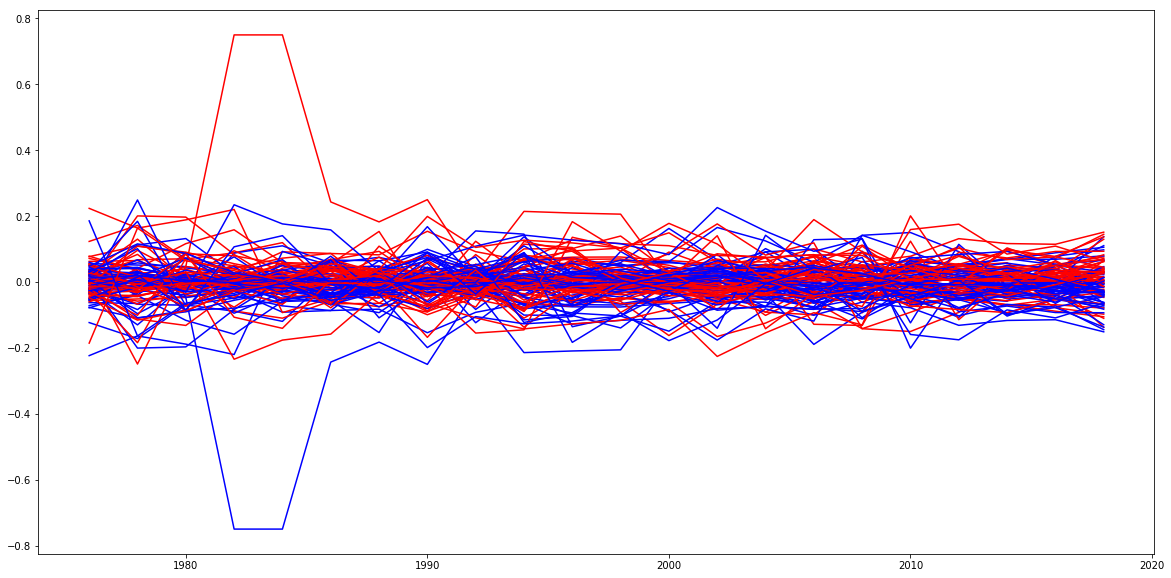

In [59]:
fig = plt.figure(figsize=[20, 10])

for state in eg.state.unique():
    
    sns.lineplot(x=eg.year.unique(), y=eg.loc[eg.state==state, 'r_eg'].values, color='red')
    
    sns.lineplot(x=eg.year.unique(), y=eg.loc[eg.state==state, 'd_eg'].values, color='blue')


plt.show()